# Using javasript in browser and Fastai(Python)

Works manually

Good for small scale data(100-200 images)



In [ ]:
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

Uninstalling torch-1.5.0+cu101:
  Successfully uninstalled torch-1.5.0+cu101
Uninstalling torchvision-0.6.0+cu101:
  Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 37.8MB/s 


In [1]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll 

> Indented block



Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.<br>

### Download into file

Run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.<br>

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.<br>

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ads block add-ons (YouBlock) in Chrome. Otherwise window.open() coomand doesn't work. Then you can run the following commands:<br>

In [ ]:
#Use this for DUCKDUCKGO --  this is javascript to run in browser

urls = Array.from(document.querySelectorAll('.tile--img__img')).map(el=> el.hasAttribute('data-src')? "https:"+el.getAttribute('data-src'):"https:"+el.getAttribute('src'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

### Create directory and upload urls file into your server 

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.<br>

In [39]:
'''folder = '2'
file = '/content/2.csv'
'''
#or 

folder = '3'
file = '/content/3.csv'

In [40]:
path = Path('/content/data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()

[PosixPath('/content/data/2'),
 PosixPath('/content/data/1'),
 PosixPath('/content/data/content'),
 PosixPath('/content/data/3')]

## Download images 

In [41]:
classes = ['1','2']

download_images(path/file, dest, max_pics=200)

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

1


2


## View data 浏览数据

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=64, num_workers=4).normalize(imagenet_stats)

In [43]:
data.classes

['1', '2', '3']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

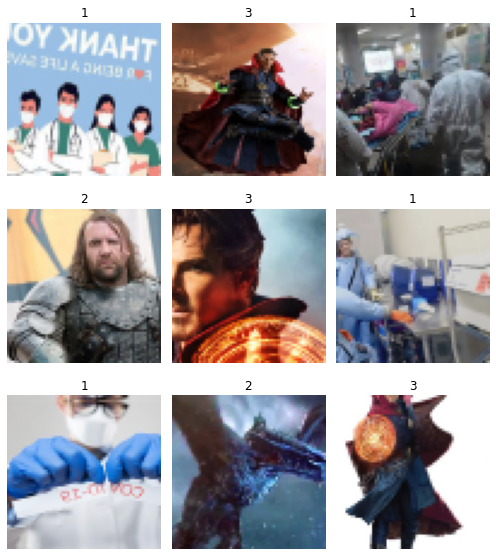

In [44]:
data.show_batch(rows=3, figsize=(7,8))

In [37]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['1', '2'], 2, 477, 119)